# Quantum Encoding

The Quantum Integer Encoding Circuit Generator is a versatile module designed to facilitate the seamless integration of classical integer values into quantum circuits. By inputting an integer value n and specifying the number of qubits q within the quantum circuit, this module constructs a robust and efficient quantum circuit that encodes the provided integer into a coherent quantum state.

### Key Features:

#### Integer Encoding:

The module offers a powerful mechanism for encoding integer values into quantum states, allowing seamless interaction between classical and quantum components within a broader quantum computation.

#### Adaptive Circuit Generation:

Upon receiving the desired integer value and qubit count, the module dynamically generates an optimized quantum circuit. The generated circuit encompasses a series of quantum operations meticulously crafted to represent the provided integer in quantum superposition.

#### Enhanced Quantum Computation:

By embedding classical integer values directly into quantum circuits, researchers and practitioners gain the advantage of harnessing the capabilities of quantum computation to process, manipulate, and analyze the encoded information.
Modularity and Reusability: The module is designed with modularity in mind, enabling its integration into various quantum algorithms, protocols, and applications. The resulting circuits can serve as fundamental building blocks in the development of advanced quantum workflows.

### Enhancement / Next Steps

- Encode different values
- Combine the circuit
- Add a control gate to each block


In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [2]:
# Libraries
import numpy as np
from numpy import pi
import math
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import C3XGate
from qiskit.circuit.library import MCXGate

In [3]:
def powers_of_2(n):
    """
    Calculate the powers of 2 required to represent a number.
    Args:
        n (int): The input number for which to calculate the powers of 2.
    Returns:
        list: A list of non-negative integers representing the powers of 2 needed to represent the input number.
    Examples:
        >>> powers_of_2(15)
        [3, 2, 1, 0]
        >>> powers_of_2(32)
        [5]
        >>> powers_of_2(63)
        [5, 4, 3, 2, 1, 0]
    """
    powers = []
    power = 0

    while n > 0:
        if n % 2 == 1:
            powers.append(power)
        n //= 2
        power += 1
    
    return powers[::-1]

# Test cases
n = 15
print(n, powers_of_2(n))  # Output: [3, 2, 1, 0]
n = 32
print(n, powers_of_2(n))  # Output: [5]
n = 63
print(n, powers_of_2(n))  # Output: [5, 4, 3, 2, 1, 0]


15 [3, 2, 1, 0]
32 [5]
63 [5, 4, 3, 2, 1, 0]


In [4]:
def sum_n_pow_2(n, q):
    """
    Create a quantum circuit that performs addition by a power of 2.
    Args:
        n (int): The power of 2 by which to perform the addition.
        q (int): The number of qubits in the quantum circuit.
    Returns:
        QuantumCircuit: A quantum circuit that performs addition by the specified power of 2.
    Examples:
        >>> circuit = sum_n_pow_2(2, 4)
        >>> print(circuit)        
        >>> circuit = sum_n_pow_2(3, 5)
        >>> print(circuit)
    """
    qr = QuantumRegister(q, 'q')
    p = int(math.log(n, 2))
    circuit = QuantumCircuit(qr, name=str('sum_' + str(n)))

    lst = [i for i in range(1, (q - 1) - p + 1)]
    for i in range((q - 1) - p):
        circuit.mcx(lst, i)
        lst.pop(0)

    circuit.x((q - 1) - p)

    return circuit


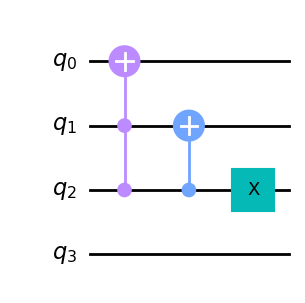

In [5]:
# sum of 2 with 4 qubits
n = 2
q = 4
s2 = sum_n_pow_2(n, q)
s2.draw()

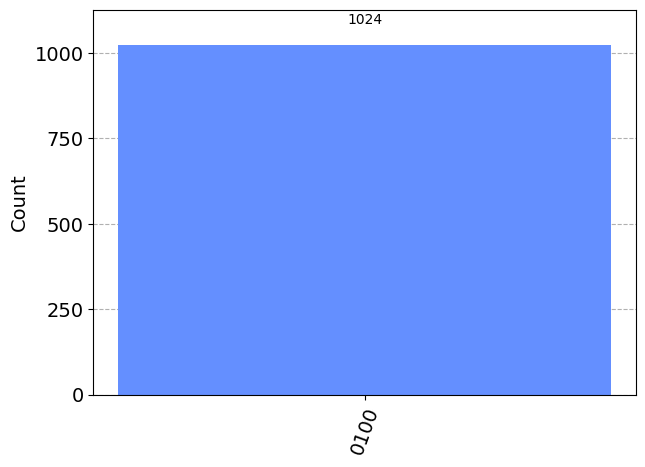

In [6]:
s2.measure_all()

# execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(s2, simulator, shots=1024)

# retrieve the counts of the measurement outcomes
result = job.result()
counts = result.get_counts()

# plot the histogram of the counts
plot_histogram(counts)

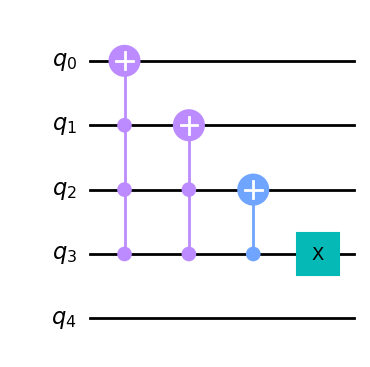

In [7]:
n = 2
q = 5
s2 = sum_n_pow_2(n, q)
s2.draw()

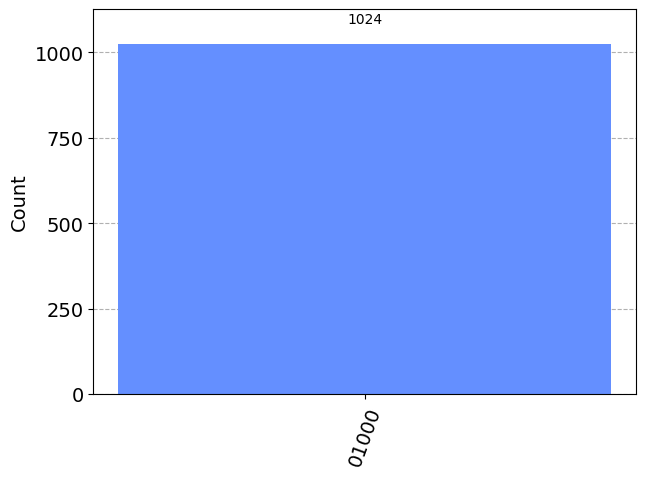

In [8]:
s2.measure_all()

# execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(s2, simulator, shots=1024)

# retrieve the counts of the measurement outcomes
result = job.result()
counts = result.get_counts()

# plot the histogram of the counts
plot_histogram(counts)

In [9]:
def adder(n, q):
    """
    Create a quantum circuit for performing addition of a specified integer.
    Args:
        n (int): The integer to add using the quantum adder circuit.
        q (int): The number of qubits in the quantum circuit.
    Returns:
        QuantumCircuit: A quantum circuit that performs addition of the specified integer.
    Examples:
        >>> circuit = adder(5, 4)
        >>> print(circuit)
        >>> circuit = adder(7, 5)
        >>> print(circuit)
    """
    qr = QuantumRegister(q, 'q')
    circuit = QuantumCircuit(qr, name=str('sum_' + str(n)))
    powers = powers_of_2(n)
    for power in sorted(powers):
        power_sum = sum_n_pow_2(2**power, q)
        circuit.compose(power_sum, inplace=True)
        circuit.barrier()
    return circuit


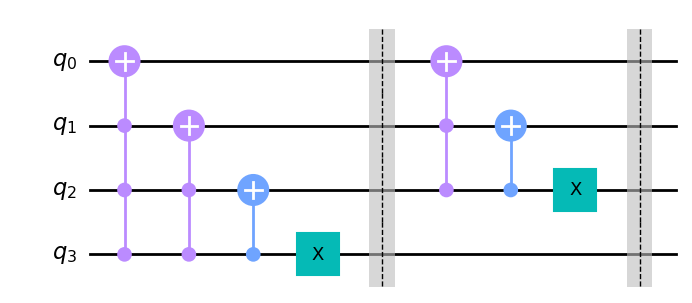

In [10]:
n = 3
q = 4

circ = adder(3, 4)
circ.draw()

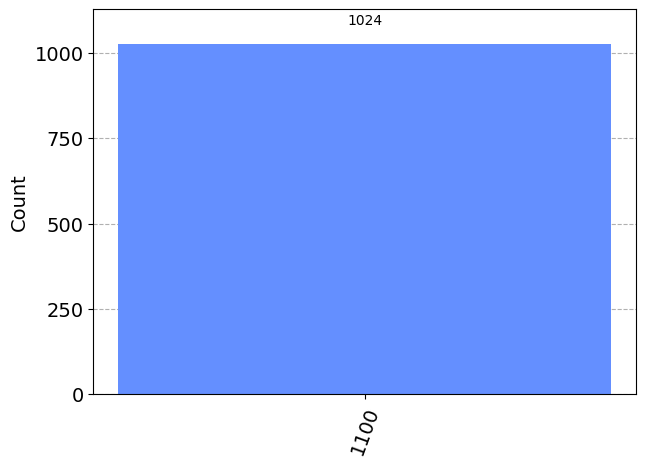

In [11]:
circ.measure_all()

# execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=1024)

# retrieve the counts of the measurement outcomes
result = job.result()
counts = result.get_counts()

# plot the histogram of the counts
plot_histogram(counts)

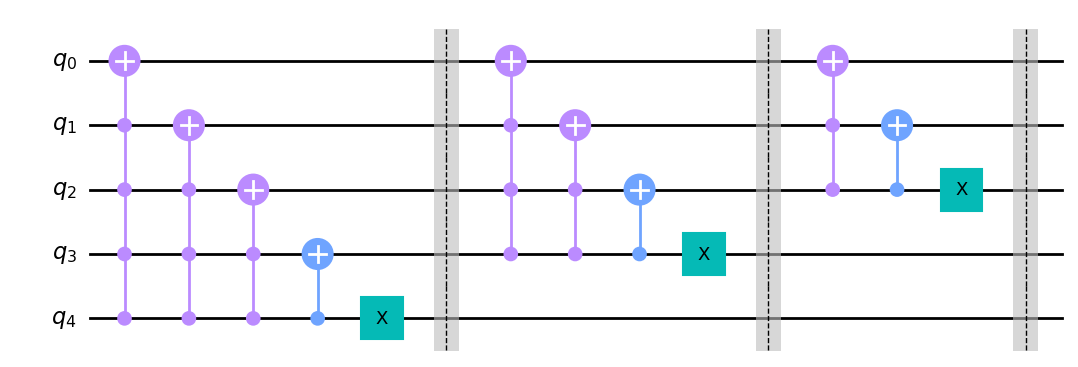

In [12]:
n = 7
q = 5

circ = adder(n, q)
circ.draw()

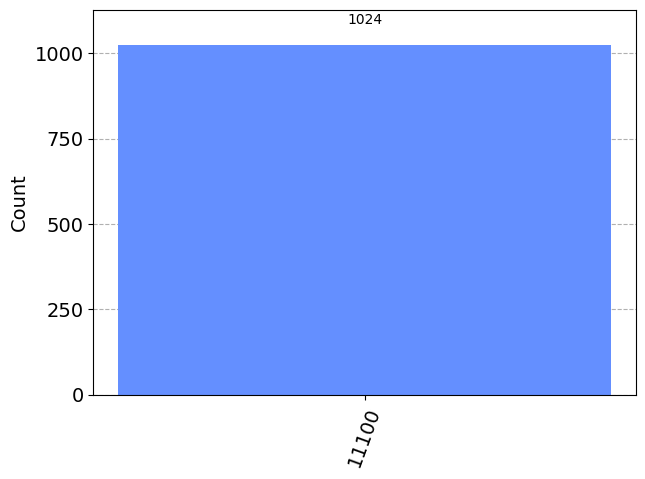

In [13]:
circ.measure_all()

# execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=1024)

# retrieve the counts of the measurement outcomes
result = job.result()
counts = result.get_counts()

# plot the histogram of the counts
plot_histogram(counts)

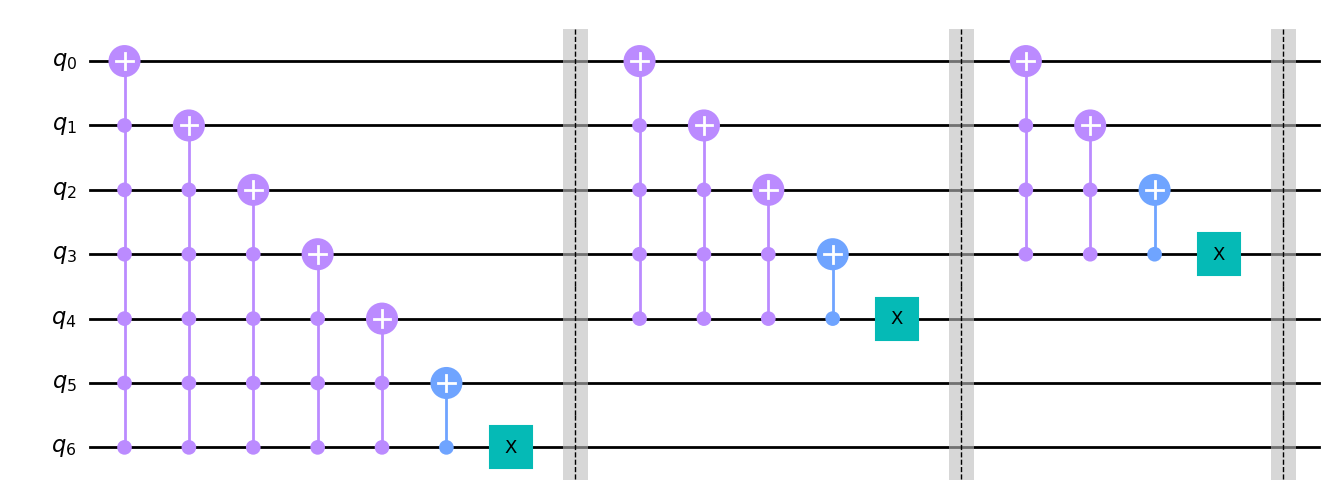

In [14]:
n = 13
q = 7

circ = adder(n, q)
circ.draw()

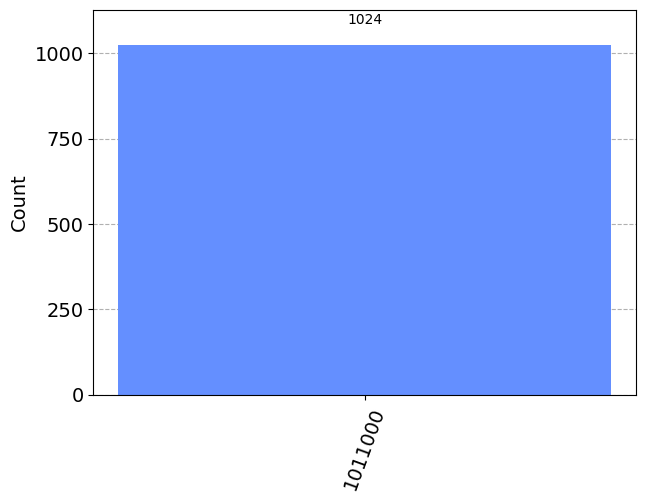

In [15]:
circ.measure_all()

# execute the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
job = execute(circ, simulator, shots=1024)

# retrieve the counts of the measurement outcomes
result = job.result()
counts = result.get_counts()

# plot the histogram of the counts
plot_histogram(counts)

---